# **Green Bean Price Tracker**

## Passing login form with Requests and BautifulSoup

Imports (it is successful if there are no errors).

In [15]:
# Standart packages
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

# E-mail notifictions packages
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Custom imports
import config as cfg 

__Requests__ is an HTTP library for Python, that allows to send HTTP/1.1 requests easy (no need to manually add query strings to your URLs, or to form-encode your POST data.) Keep-alive and HTTP connection pooling are 100% automatic, thanks to urllib3.

__Beautiful Soup__ is a Python library for pulling data out of HTML and XML files (we will work with HTML files), by representing the HTML as a set of objects with methods used to parse the HTML. We can navigate the HTML as a tree and/or filter out what we are looking for.  

In [16]:
# URL of our target page we gonna scrap.
url = "https://offerlist.rehmcoffee.de"

__Session__ object because:
+ it allows us to persist certain parameters across requests
+ it persists cookies across all requests made from the Session instance 
+ It has all the methods of the main Requests API

In [17]:
s = requests.Session()

Firstly, we use __Requests__ to get access to the page content.

In [18]:
# Using Requests's method get on session object to get access to the page content.
login_form = s.get(url)

In [19]:
# Printing out the URL of the page to check if everything works proper.
login_form.url

'https://offerlist.rehmcoffee.de/'

In [20]:
# Calling attribute content to see the content of the login page before we try to log in.
login_form.content

b'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n\r\n<meta charset="utf-8">\r\n<!-- \n\tThis website is powered by TYPO3 - inspiring people to share!\r\n\tTYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL.\r\n\tTYPO3 is copyright 1998-2021 of Kasper Skaarhoj. Extensions are copyright of their respective owners.\r\n\tInformation and contribution at https://typo3.org/\r\n-->\r\n\r\n\r\n\r\n<title>Rehm &amp; Co.</title>\r\n<meta name="generator" content="TYPO3 CMS" />\n<meta property="og:site_name" content="Rehm &amp; Co" />\r\n\r\n\r\n<link rel="stylesheet" type="text/css" href="/typo3temp/assets/css/d42b6e1bdf.css?1592917648" media="all">\n<link rel="stylesheet" type="text/css" href="/fileadmin/rehm/Resources/Public/StyleSheet/reset.css?1592910509" media="all">\n<link rel="stylesheet" type="text/css" href="/fileadmin/rehm/Resources/Public/StyleSheet/fontawesome.min.css?1592910510" media="all">\n<link rel="styleshee

To parse a document, we pass it into the `BeautifulSoup` constructor.Then we create a `BeautifulSoup` object : *soup* , which represents the document as a nested data structure.

In [21]:
soup_login_form = BeautifulSoup(login_form.content,"html5lib")

In [22]:
# Using prettify() method  to display the HTML in the nested structure:
print(soup_login_form.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <!-- 
	This website is powered by TYPO3 - inspiring people to share!
	TYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL.
	TYPO3 is copyright 1998-2021 of Kasper Skaarhoj. Extensions are copyright of their respective owners.
	Information and contribution at https://typo3.org/
-->
  <title>
   Rehm &amp; Co.
  </title>
  <meta content="TYPO3 CMS" name="generator"/>
  <meta content="Rehm &amp; Co" property="og:site_name"/>
  <link href="/typo3temp/assets/css/d42b6e1bdf.css?1592917648" media="all" rel="stylesheet" type="text/css"/>
  <link href="/fileadmin/rehm/Resources/Public/StyleSheet/reset.css?1592910509" media="all" rel="stylesheet" type="text/css"/>
  <link href="/fileadmin/rehm/Resources/Public/StyleSheet/fontawesome.min.css?1592910510" media="all" rel="stylesheet" type="text/css"/>
  <link href="https://d1a7bb4s34c11s.cloudfront.net/cookiejar.

Next, we search for inputs are required to submit to login form to pass it. Below we can see that not _user_ and _password_ but also few extra tokens are required. 

In [23]:
list_input = soup_login_form.find_all("input")
list_input

[<input id="user" name="user" placeholder="Username" type="text" value=""/>,
 <input data-rsa-encryption="" id="pass" name="pass" placeholder="Password" type="password" value=""/>,
 <input name="logintype" type="hidden" value="login"/>,
 <input name="pid" type="hidden" value="77"/>,
 <input name="redirect_url" type="hidden" value=""/>,
 <input name="tx_felogin_pi1[noredirect]" type="hidden" value="0"/>]

In [24]:
token_nr1 = soup_login_form.find("input", {"name":"logintype"})["value"]
token_nr2 = soup_login_form.find("input", {"name":"pid"})["value"]
token_nr3 = soup_login_form.find("input", {"name":"redirect_url"})["value"]
token_nr4 = soup_login_form.find("input", {"name":"tx_felogin_pi1[noredirect]"})["value"]

In [25]:
print(token_nr1)
print(token_nr2)
print(token_nr3)
print(token_nr4)

login
77

0


Earlier we created __config.py__ to store sensitive data as usernames and passwords. 

If you try to find register form at https://offerlist.rehmcoffee.de , there is none. You need to contact company and request login info. Be aware you will need to provide company info to get access to offer page. 


__config.py__ consists of a line of code, a dictionary of the following format:

`login_data = {'user': 'name@company-name.com', 'pass': 'password_received_from_trader'}`
A config file has to be created in the root directory of the project and it will be called from the code as follows:

In [26]:
#login_data = {"user":"mymail@company-name.com", "pass":"your_password", "logintype":token_nr1, "pid":token_nr2, "redirect_url":token_nr3, "tx_felogin_pi1[noredirect]":token_nr4}
login_data = cfg.login_data
login_data["logintype"] = token_nr1
login_data["pid"] = token_nr2
login_data["redirect_url"] = token_nr3
login_data["tx_felogin_pi1[noredirect]"] = token_nr4

In [27]:
s.post(url, login_data)

<Response [200]>

__Status code:200__ in the Response message in HTTP Protocol stays for OK (any 2xx stays for Success). If we skip `Session()` and go for `requests.get(url)` above, while our response code will be still OK we will not stay logged in what will result in landing on login form again again. 

In [28]:
offer_page = s.get(url)

In [29]:
offer_page.content

b'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n\r\n<meta charset="utf-8">\r\n<!-- \n\tThis website is powered by TYPO3 - inspiring people to share!\r\n\tTYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL.\r\n\tTYPO3 is copyright 1998-2021 of Kasper Skaarhoj. Extensions are copyright of their respective owners.\r\n\tInformation and contribution at https://typo3.org/\r\n-->\r\n\r\n\r\n\r\n<title>Rehm &amp; Co.</title>\r\n<meta name="generator" content="TYPO3 CMS" />\n<meta property="og:site_name" content="Rehm &amp; Co" />\r\n\r\n\r\n<link rel="stylesheet" type="text/css" href="/typo3temp/assets/css/d42b6e1bdf.css?1592917648" media="all">\n<link rel="stylesheet" type="text/css" href="/fileadmin/rehm/Resources/Public/StyleSheet/reset.css?1592910509" media="all">\n<link rel="stylesheet" type="text/css" href="/fileadmin/rehm/Resources/Public/StyleSheet/fontawesome.min.css?1592910510" media="all">\n<link rel="styleshee

Going throgh content we see that we successfully passed the login form and have excess to data we going to scrap. 

## Using **BeautifulSoup** and **Pandas** to extract the data into DataFrame

Pass HTML into the `BeautifulSoup` constructor, then create a new `BeautifulSoup` object : *soup_offer_page* , which represents the HTML code as a nested data structure.

In [30]:
soup_offer_page = BeautifulSoup(offer_page.content,"html5lib")

In [31]:
print(soup_offer_page.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <!-- 
	This website is powered by TYPO3 - inspiring people to share!
	TYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL.
	TYPO3 is copyright 1998-2021 of Kasper Skaarhoj. Extensions are copyright of their respective owners.
	Information and contribution at https://typo3.org/
-->
  <title>
   Rehm &amp; Co.
  </title>
  <meta content="TYPO3 CMS" name="generator"/>
  <meta content="Rehm &amp; Co" property="og:site_name"/>
  <link href="/typo3temp/assets/css/d42b6e1bdf.css?1592917648" media="all" rel="stylesheet" type="text/css"/>
  <link href="/fileadmin/rehm/Resources/Public/StyleSheet/reset.css?1592910509" media="all" rel="stylesheet" type="text/css"/>
  <link href="/fileadmin/rehm/Resources/Public/StyleSheet/fontawesome.min.css?1592910510" media="all" rel="stylesheet" type="text/css"/>
  <link href="https://d1a7bb4s34c11s.cloudfront.net/cookiejar.

In [32]:
# Checking how many tables are on page.

tables = soup_offer_page.find_all('table')
len(tables)

3

In [33]:
tables

[<table cellpadding="0" cellspacing="0">
 								<thead>
 									<tr>
 										<th>Month</th>
 										<th>NYC</th>
 										<th>Month</th>
 										<th>LDN</th>
 									</tr>
 								</thead>
 								<tbody>
 									
 										<tr>
 											<td>Jul 21</td>
 											<td>142,55</td>
 											<td>Jul 21</td>
 											<td>1429</td>
 										</tr>
 									
 										<tr>
 											<td>Sep 21</td>
 											<td>144,45</td>
 											<td>Sep 21</td>
 											<td>1449</td>
 										</tr>
 									
 										<tr>
 											<td>Dec 21</td>
 											<td>146,70</td>
 											<td>Nov 21</td>
 											<td>1464</td>
 										</tr>
 									
 										<tr>
 											<td>USD / EUR</td>
 											<td>1,21</td>
 											<td></td>
 											<td></td>
 										</tr>
 									
 								</tbody>
 							</table>,
 <table cellpadding="0" cellspacing="0">
 								<tbody>
 									<!-- <tr>
 										<td>Sina Albrecht</td>
 									

The output is 3 tables. If we visit the  https://offerlist.rehmcoffee.de/ we can see exactly 3 tables: Stock Exchange, Your Contact and the third one in which on fact we are interested in.

Now we automate table choice. Below the loop that search for words in tables and prints an index of a table in cell below, than displays the html code as nested structure of this table in the next cell. (we need to feed it with words unique to the table we are searching).

In [34]:
for index,table in enumerate(tables):
    if ("almond" in str(table)):
        table_index = index
        
print(table_index)

2


In [35]:
print(tables[table_index].prettify())

<table id="datatables" width="100%">
 <thead>
  <tr>
   <th class="sort" data-name="origin">
    Origin
   </th>
   <th class="sort" data-name="coffee">
    Coffee
   </th>
   <th class="sort" data-name="bags">
    Bags
   </th>
   <th class="no-sort" data-name="kg">
    Unit
   </th>
   <!-- <th data-name="packaging" class="no-sort">Packaging</th> -->
   <th class="sort" data-name="farmname">
    Farm / Name
   </th>
   <th class="sort" data-name="process">
    Process
   </th>
   <th class="sort" data-name="cert">
    Cert.
   </th>
   <!-- <th data-name="category" class="sort">Category</th> -->
   <!-- <th data-name="producer" class="sort">Producer</th> -->
   <th class="sort" data-name="cupprofile">
    Cup Profile
   </th>
   <!-- <th data-name="variety" class="sort">Variety</th> -->
   <!-- <th data-name="region" class="sort">Region</th> -->
   <!-- <th data-name="crop" class="sort">Crop</th> -->
   <th class="sort" data-name="availability">
    Avail.
   </th>
   <th class="sort

It is possible to scrape data from HTML tables into a DataFrame using BeautifulSoup and the Pandas function `read_html`that creates a DataFrame and populates it.

Our table is `tables[table_index]`. 

When we use the pandas function `read_html`, we give it the string version of the table as well as the flavor which is the parsing engine bs4.

The function `read_html` always returns a list of DataFrames so we must pick the one we want out of the list. We use `[0]` index as we already spicified proper table from tables above.

We can also use the read_html function to directly get DataFrames from a url and than pick the DataFrame we need out of the list as follows (but this works when we don't need to pass a login form):
<code>
whole_page_df = pd.read_html(url, flavor='bs4')
len(whole_page_df)
whole_page_df[1]
<code>


In [36]:
offer_list_rehm_df = pd.read_html(str(tables[table_index]), flavor='bs4')[0]
offer_list_rehm_df

,Origin,Coffee,Bags,Unit,Farm / Name,Process,Cert.,Cup Profile,Avail.,€ / KG,$ / KG,Info,Unnamed: 12
0,BLEND,DECAFFEINATED,101,60kg,Espresso Blend DCM Decaffeinated,DCM decaf,NaN,"dark chocolate, hazelnut",Hamb,"4,35€","5,26$",NaN,NaN
1,BRAZIL,ARABICA SPOT,460,59kg,Santos Aquarela NY2 17/18 s.s. fine cup,natural,NaN,"chocolate, almond",Hamb,"2,80€","3,39$",NaN,NaN
2,BRAZIL,ARABICA SPOT,65,59kg,Cerrado Doce Diamantina NY2 16up natural,natural,NaN,"hazelnut, almond, milk chocolate",Hamb,"2,88€","3,48$",NaN,NaN
3,BRAZIL,ARABICA SPOT,710,59kg,Mogiana Bella Giana NY2 17/18 s.s. fine cup pu...,pulped natural,NaN,"hazelnut, cream",Hamb,"2,95€","3,57$",Factsheet,NaN
4,BRAZIL,ARABICA SPOT,99,59kg,Santos NY2 Screen 19 s.s. fine cup,natural,NaN,"hazelnut, almond, milk chocolate",Hamb,"3,24€","3,92$",Factsheet,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,MEXICO,ARABICA SPOT,125,69kg,Finca el Flamingo Organic,washed,ORG,NaN,Hamb,"4,43€","5,35$",Factsheet,NaN
72,NICARAGUA,ARABICA SPOT,178,69kg,Finca San Ramón Screen 18,washed,NaN,"almond, lemon, tea like",Hamb,"4,23€","5,11$",NaN,NaN
73,PANAMA,ARABICA SPOT,11,15kg,Finca Los Limones natural,natural,NaN,"blueberry, raisin, nougat",Hamb,"23,19€","28,04$",Factsheet,NaN
74,PANAMA,ARABICA SPOT,200,60kg,SHB EP Boquete Finca El Salto,washed,NaN,"honey, almond, nougat",Hamb,"6,11€","7,39$",Factsheet,NaN


## Data preparation before storaging 

### Adding Date column

We create Timestamp object that provides current Timestamp, using Pandas `.to_datetime` method on arg 'today' to get current timestamp (not just date) in local timezone and `normalize()` to keep the date as a Timestamp.

In [75]:
current_date = pd.to_datetime('today').normalize()
current_date

Timestamp('2021-05-02 00:00:00')

In [ ]:
offer_list_rehm_df['offer_date'] = current_date
offer_list_rehm_df

### Modifying Unit, € / KG and D / KG columns values

Copy dataframe to check how our functions acts and modify data only after all functions correct

In [ ]:
offer_list_rehm_df_copy = offer_list_rehm_df.copy(deep=True)
offer_list_rehm_df_copy

First we create functions to modify the column's values

In [ ]:
def clean_unit_col(x):
    x = x.replace("kg", "").replace(" ", "")
    return int(x)

In [ ]:
def clean_eur_col(x):
    x = x.replace("€", "").replace(",", ".").replace(" ", "")
    return round(float(x),2)

In [ ]:
def clean_usd_col(x):
    x = x.replace("$", "").replace(",", ".").replace(" ", "")
    return round(float(x),2)

Now we pass it to apply method. 

In [ ]:
offer_list_rehm_df_copy['€ / KG'] = offer_list_rehm_df_copy['€ / KG'].apply(clean_eur_col)
offer_list_rehm_df_copy

In [ ]:
offer_list_rehm_df_copy['$ / KG'] = offer_list_rehm_df_copy['$ / KG'].apply(clean_usd_col)
offer_list_rehm_df_copy

In [ ]:
offer_list_rehm_df_copy['Unit'] = offer_list_rehm_df_copy['Unit'].apply(clean_unit_col)
offer_list_rehm_df_copy

In [ ]:
offer_list_rehm_df_copy

In [ ]:
offer_list_rehm_df_copy.to_csv('scraped-data/rehm-offer-list.csv',index=False)

Now our info bundle is completed. We can move further and place it in file. 

## Placing scraped data for storage in .csv file using  **Pandas** on local machine

Using cell magic we execute `bash` commands to create folders to place our scraped data in a properly arranged manner.

In [ ]:
%%bash
mkdir green-bean-price-tracker 
cd green-bean-price-tracker 
mkdir scraped-data
cd ~

Using line magic we check Path Working Directory to be sure that we got back to proper location.

In [ ]:
%pwd

Using `to_scv` method we create .csv file where we will collect our data as green bean trader publish new updates to offer list. 

In [ ]:
offer_list_rehm_df_copy.to_csv('scraped-data/rehm-offer-list.csv',index=False)

Now we can check our folders and the.csv file manually to be sure all in place. If we open .csv file with Excel we can see some formating issues therefore we will check the values calling `read_csv` to be sure all values are intact. If you got Error trying to read file, check whether you closed the fail in Excel after checking it. 

In [ ]:
pd.read_csv('scraped-data/rehm-offer-list.csv')

## Appending .csv fail with new data release

The green bean trader publishes updates to the offer list weekly. We plan to log in weekly and append the .csv fail with full list. 

In [ ]:
# IMPORTANT: run only when new data is available from trader!
offer_list_rehm.to_csv('scraped-data/rehm-offer-list.csv',mode='a',index=False,header=False)

Checking whether new data is available from trader.

In [ ]:
df_today = pd.read_csv('scraped-data/rehm-offer-list.csv')
df_previous = pd.read_csv('scraped-data/rehm-offer-list-14.04.2021.csv')

In [ ]:
df_previous.Bags == offer_list_rehm.Bags 

In [ ]:
df_previous.Bags.compare(offer_list_rehm.Bags)

## Compare dataframes

In [4]:
df_last = pd.read_csv('scraped-data/rehm-offer-list.csv', index_col = False)
#df_last = df_last.reset_index(drop=True)
df_last

,Origin,Coffee,Bags,Unit,Farm / Name,Process,Cert.,Cup Profile,Avail.,€ / KG,$ / KG,Info,Unnamed: 12,offer_date
0,BLEND,DECAFFEINATED,101,60,Espresso Blend DCM Decaffeinated,DCM decaf,NaN,"dark chocolate, hazelnut",Hamb,4.35,5.26,NaN,NaN,2021-04-28
1,BRAZIL,ARABICA SPOT,460,59,Santos Aquarela NY2 17/18 s.s. fine cup,natural,NaN,"chocolate, almond",Hamb,2.80,3.39,NaN,NaN,2021-04-28
2,BRAZIL,ARABICA SPOT,65,59,Cerrado Doce Diamantina NY2 16up natural,natural,NaN,"hazelnut, almond, milk chocolate",Hamb,2.88,3.48,NaN,NaN,2021-04-28
3,BRAZIL,ARABICA SPOT,710,59,Mogiana Bella Giana NY2 17/18 s.s. fine cup pu...,pulped natural,NaN,"hazelnut, cream",Hamb,2.95,3.57,Factsheet,NaN,2021-04-28
4,BRAZIL,ARABICA SPOT,99,59,Santos NY2 Screen 19 s.s. fine cup,natural,NaN,"hazelnut, almond, milk chocolate",Hamb,3.24,3.92,Factsheet,NaN,2021-04-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,MEXICO,ARABICA SPOT,125,69,Finca el Flamingo Organic,washed,ORG,NaN,Hamb,4.43,5.35,Factsheet,NaN,2021-04-28
72,NICARAGUA,ARABICA SPOT,178,69,Finca San Ramón Screen 18,washed,NaN,"almond, lemon, tea like",Hamb,4.23,5.11,NaN,NaN,2021-04-28
73,PANAMA,ARABICA SPOT,11,15,Finca Los Limones natural,natural,NaN,"blueberry, raisin, nougat",Hamb,23.19,28.04,Factsheet,NaN,2021-04-28
74,PANAMA,ARABICA SPOT,200,60,SHB EP Boquete Finca El Salto,washed,NaN,"honey, almond, nougat",Hamb,6.11,7.39,Factsheet,NaN,2021-04-28


In [ ]:
df_twentyone = pd.read_csv('scraped-data/rehm-offer-list-21.04.2021.csv')

In [14]:
df_twentyone

,Origin,Coffee,Bags,Unit,Farm / Name,Process,Cert.,Cup Profile,Avail.,€ / KG,$ / KG,Info,Unnamed: 12,offer_date
0,BLEND,DECAFFEINATED,130,60,Espresso Blend DCM Decaffeinated,DCM decaf,NaN,"dark chocolate, hazelnut",Hamb,4.28,5.13,NaN,NaN,2021-04-23
1,BRAZIL,ARABICA SPOT,515,59,Santos Aquarela NY2 17/18 s.s. fine cup,natural,NaN,"chocolate, almond",Hamb,2.72,3.26,NaN,NaN,2021-04-23
2,BRAZIL,ARABICA SPOT,117,59,Cerrado Doce Diamantina NY2 16up natural,natural,NaN,NaN,Hamb,2.79,3.35,NaN,NaN,2021-04-23
3,BRAZIL,ARABICA SPOT,80,59,Mogiana Bella Giana NY2 17/18 s.s. fine cup pu...,pulped natural,NaN,"hazelnut, cream",Hamb,2.86,3.44,Factsheet,NaN,2021-04-23
4,BRAZIL,ARABICA SPOT,105,59,Santos NY2 Screen 19 s.s. fine cup,natural,NaN,"hazelnut, almond, milk chocolate",Hamb,3.16,3.79,NaN,NaN,2021-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,MEXICO,ARABICA SPOT,53,69,Finca el Flamingo Organic,washed,ORG,NaN,Hamb,4.35,5.22,NaN,NaN,2021-04-23
59,NICARAGUA,ARABICA SPOT,229,69,Finca San Ramón Screen 18,washed,NaN,"almond, lemon, tea like",Hamb,4.26,5.11,NaN,NaN,2021-04-23
60,PANAMA,ARABICA SPOT,13,15,Finca Los Limones natural,natural,NaN,"blueberry, raisin, nougat",Hamb,23.37,28.04,Factsheet,NaN,2021-04-23
61,RWANDA,ARABICA SPOT,68,60,Rugali Screen 15up,washed,NaN,"almond, green tea",Hamb,4.28,5.14,Factsheet,NaN,2021-04-23


In [6]:
df_twentyone.set_index(['Farm / Name'])

,Origin,Coffee,Bags,Unit,Process,Cert.,Cup Profile,Avail.,€ / KG,$ / KG,Info,Unnamed: 12,offer_date
Farm / Name,,,,,,,,,,,,,
Espresso Blend DCM Decaffeinated,BLEND,DECAFFEINATED,130,60,DCM decaf,NaN,"dark chocolate, hazelnut",Hamb,4.28,5.13,NaN,NaN,2021-04-23
Santos Aquarela NY2 17/18 s.s. fine cup,BRAZIL,ARABICA SPOT,515,59,natural,NaN,"chocolate, almond",Hamb,2.72,3.26,NaN,NaN,2021-04-23
Cerrado Doce Diamantina NY2 16up natural,BRAZIL,ARABICA SPOT,117,59,natural,NaN,NaN,Hamb,2.79,3.35,NaN,NaN,2021-04-23
Mogiana Bella Giana NY2 17/18 s.s. fine cup pulped natural,BRAZIL,ARABICA SPOT,80,59,pulped natural,NaN,"hazelnut, cream",Hamb,2.86,3.44,Factsheet,NaN,2021-04-23
Santos NY2 Screen 19 s.s. fine cup,BRAZIL,ARABICA SPOT,105,59,natural,NaN,"hazelnut, almond, milk chocolate",Hamb,3.16,3.79,NaN,NaN,2021-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Finca el Flamingo Organic,MEXICO,ARABICA SPOT,53,69,washed,ORG,NaN,Hamb,4.35,5.22,NaN,NaN,2021-04-23
Finca San Ramón Screen 18,NICARAGUA,ARABICA SPOT,229,69,washed,NaN,"almond, lemon, tea like",Hamb,4.26,5.11,NaN,NaN,2021-04-23
Finca Los Limones natural,PANAMA,ARABICA SPOT,13,15,natural,NaN,"blueberry, raisin, nougat",Hamb,23.37,28.04,Factsheet,NaN,2021-04-23


In [11]:
df_twentyone.set_index(['Farm / Name']).sort_index(ascending=True).loc['Burka Estate AB']

Origin                           TANZANIA
Coffee                       ARABICA SPOT
Bags                                   21
Unit                                   60
Process                            washed
Cert.                                 NaN
Cup Profile    green tea, rosehip, floral
Avail.                               Hamb
€ / KG                               4.85
$ / KG                               5.82
Info                            Factsheet
Unnamed: 12                           NaN
offer_date                     2021-04-23
Name: Burka Estate AB, dtype: object

In [13]:
df_last.compare(df_twentyone, keep_shape=True)

ValueError: Can only compare identically-labeled DataFrame objects

## Data Visualization


In [70]:
df_read = pd.read_csv('scraped-data/rehm-offer-list.csv')

In [76]:
df_likelast = df_read.loc[df_read['offer_date'] == current_date]

In [77]:
df_likelast

,Origin,Coffee,Bags,Unit,Farm / Name,Process,Cert.,Cup Profile,Avail.,€ / KG,$ / KG,Info,Unnamed: 12,offer_date


In [40]:
df_last.describe()

,Bags,Unit,€ / KG,$ / KG,Unnamed: 12
count,76.000000,76.000000,76.000000,76.000000,0.0
mean,109.421053,57.394737,8.909211,10.768816,NaN
std,134.604038,17.348259,13.661160,16.516933,NaN
min,1.000000,5.000000,1.950000,2.360000,NaN
25%,12.500000,59.000000,4.100000,4.960000,NaN
50%,65.500000,60.000000,4.495000,5.430000,NaN
75%,148.250000,69.000000,6.050000,7.320000,NaN
max,710.000000,70.000000,66.780000,80.730000,NaN


For the "Bags" provide a boxplot

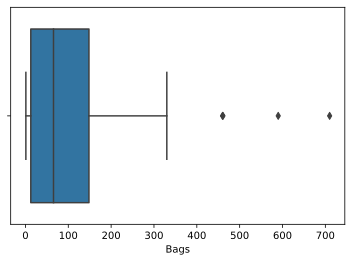

In [37]:
ax = sns.boxplot(x='Bags', data = df_last)

Create a histogram for the "Bags" variable

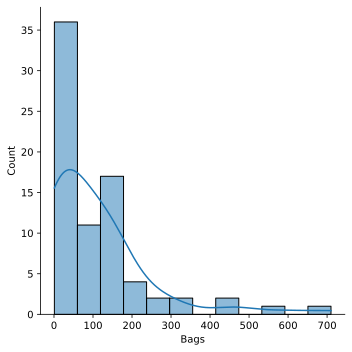

In [47]:
ax = sns.displot(df_last['Bags'], kde = True)

For the "€ / KG" provide a boxplot

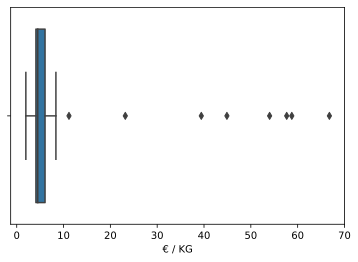

In [38]:
ax = sns.boxplot(x='€ / KG', data = df_last)

Provide a boxplot for the "€ / KG" variable vs the "Bags" variable. (Discretize the "€ / KG" variable into three groups of 4 € / KG and less, between 4 and 8 € / KG and 8 € / KG and higher)

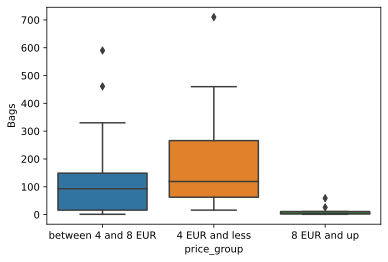

In [41]:
df_last.loc[(df_last['€ / KG'] <= 4), 'price_group'] = '4 EUR and less'
df_last.loc[(df_last['€ / KG'] > 4)&(df_last['€ / KG'] < 8), 'price_group'] = 'between 4 and 8 EUR'
df_last.loc[(df_last['€ / KG'] >= 8), 'price_group'] = '8 EUR and up'

ax = sns.boxplot(x="price_group", y="Bags", data=df_last)

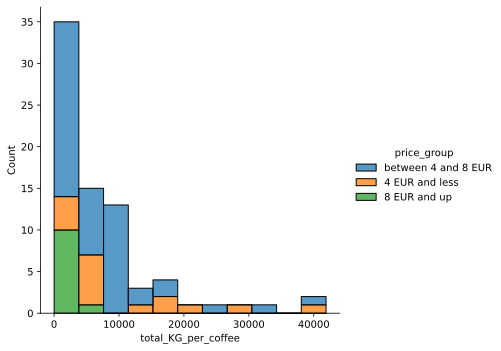

In [64]:
sns.displot(x="total_KG_per_coffee",hue="price_group",multiple="stack",data=df_last)

C:\Users\Yana\miniconda3\envs\green-bean-price-tracker\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Yana\miniconda3\envs\green-bean-price-tracker\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Yana\miniconda3\envs\green-bean-price-tracker\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Yana\miniconda3\envs\green-bean-price-tracker\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


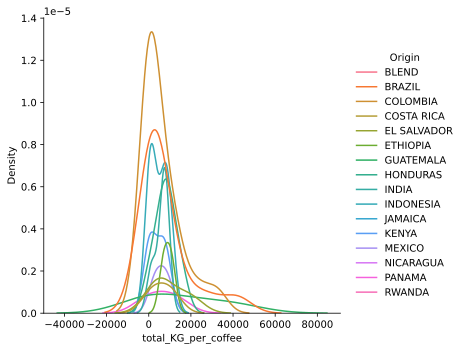

In [68]:
sns.displot(x="total_KG_per_coffee",hue="Origin", kind='kde',data=df_last)

Provide a scatter plot to show the relationship between "€ / KG" and the "Bags" per coffee. What is up with the relationship?

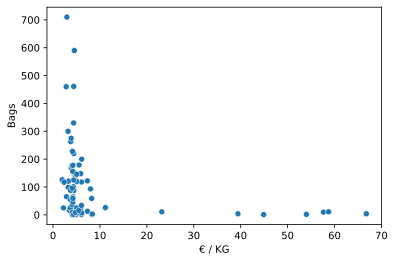

In [46]:
ax = sns.scatterplot(x='€ / KG', y='Bags',  data=df_last)

In [ ]:
df_last['total_KG_per_coffee'] = df_last['Bags'] * df_last['Unit']

In [52]:
df_last['total_EUR_per_coffee'] = df_last['total_KG_per_coffee'] * df_last['€ / KG']

In [53]:
df_last.head(5)

,Origin,Coffee,Bags,Unit,Farm / Name,Process,Cert.,Cup Profile,Avail.,€ / KG,$ / KG,Info,Unnamed: 12,offer_date,price_group,total_KG_per_coffee,total_EUR_per_coffee
0,BLEND,DECAFFEINATED,101,60,Espresso Blend DCM Decaffeinated,DCM decaf,NaN,"dark chocolate, hazelnut",Hamb,4.35,5.26,NaN,NaN,2021-04-28,between 4 and 8 EUR,6060,26361.00
1,BRAZIL,ARABICA SPOT,460,59,Santos Aquarela NY2 17/18 s.s. fine cup,natural,NaN,"chocolate, almond",Hamb,2.80,3.39,NaN,NaN,2021-04-28,4 EUR and less,27140,75992.00
2,BRAZIL,ARABICA SPOT,65,59,Cerrado Doce Diamantina NY2 16up natural,natural,NaN,"hazelnut, almond, milk chocolate",Hamb,2.88,3.48,NaN,NaN,2021-04-28,4 EUR and less,3835,11044.80
3,BRAZIL,ARABICA SPOT,710,59,Mogiana Bella Giana NY2 17/18 s.s. fine cup pu...,pulped natural,NaN,"hazelnut, cream",Hamb,2.95,3.57,Factsheet,NaN,2021-04-28,4 EUR and less,41890,123575.50
4,BRAZIL,ARABICA SPOT,99,59,Santos NY2 Screen 19 s.s. fine cup,natural,NaN,"hazelnut, almond, milk chocolate",Hamb,3.24,3.92,Factsheet,NaN,2021-04-28,4 EUR and less,5841,18924.84


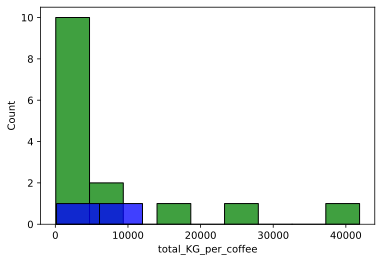

In [62]:
sns.histplot(df_last[df_last['Origin'] == 'BRAZIL']['total_KG_per_coffee'], color='green', kde=False) 
sns.histplot(df_last[df_last['Origin'] == 'PANAMA']['total_KG_per_coffee'], color="blue", kde=False) 
plt.show()

In [80]:
country_summary = df_last.groupby('Origin')['total_EUR_per_coffee'].sum()

In [81]:
type(country_summary)

pandas.core.series.Series

In [84]:
country_summary

Origin
BLEND           26361.00
BRAZIL         390576.34
COLOMBIA       541880.70
COSTA RICA      58299.48
EL SALVADOR    110123.31
ETHIOPIA       102548.40
GUATEMALA      256342.74
HONDURAS       246022.56
INDIA           74825.40
INDONESIA      168840.00
JAMAICA          9693.75
KENYA          121283.37
MEXICO          51634.77
NICARAGUA       51952.86
PANAMA          77146.35
RWANDA          15045.00
Name: total_EUR_per_coffee, dtype: float64

In [83]:
country_summary.sum()

2302576.0300000003

## E-mail notifications

In [ ]:
#email_body = '<html><head></head><body>'
##mail_body = '<style type="text/css"></style>'
#mail_body += f'<h2>text {x}</h2>'
#email_body += f'<h1><b>text</b>:  {y}</h1>'
#email_body += f'<h1><b>text</b>:  {z}</h1>'
#email_body += f'<h1><b>text</b>:  {w}</h1>'
#email_body += '<br>text'

email_body = "<html><body>Hey folks! That's green-bean-price-tracker bot here. I've prepared some fresh tasty updates to coffee offers by Rehm from: "

email_body += str(current_date)

email_body += '<br>actual info will be inserted here'

email_body += '<br>Yours green-bean-price-tracker bot</body></html>'

In [ ]:
# Email Account
email_sender_account = cfg.email_sender_account # email_sender_account = "your.registered.name@gmail.com"
email_sender_username = cfg.email_sender_username # email_sender_username = "your.registered.name"
email_sender_password = cfg.email_sender_password # email_sender_password = "your_gmail_password"
email_smtp_server = "smtp.gmail.com" # SMTP, eg smtp.gmail.com for gmail
email_smtp_port = 587 # SMTP Porf, eg 587 for gmail

# Email Content
email_recepients = ["yana.dzhulay@dbf-regensburg.de","mail@dbf-regensburg.de"]
email_subject = "test notification - weekly updates - green-bean-price-tracker "
#email_body = "here is the body"

In [ ]:
# login to email server
server = smtplib.SMTP(email_smtp_server,email_smtp_port)
server.starttls()
server.login(email_sender_username, email_sender_password)

# For loop, sending emails to all email recipients
for recipient in email_recepients:
    print("Sending email to: " , recipient)
    message = MIMEMultipart('alternative')
    message['From'] = email_sender_account
    message['To'] = recipient
    message['Subject'] = email_subject
    message.attach(MIMEText(email_body, 'html'))
    text = message.as_string()
    server.sendmail(email_sender_account,recipient,text)
    
# All emails sent, log out.
server.quit()